# **Aircraft Aviation Division Analysis**

---



Author:

Winnie Awino Odoyo



#   Problem Statement

---

The company i work at is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I have been  charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my  findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding







Now that we know what is required of us, i first have to understand the data i am working with because without an understanding then i won't be able to solve anything.

### Importing libraries



To begin, we start by importing the relevant libraries

In [463]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data from csv files

After importing the relevant libraries we ought to load our data

In [464]:
# loading my  data
aviation_data = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


aviation_data.head()




<ipython-input-464-d8ea392e9b29>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Characteristics of the datasets

Now that our data is loaded, we have to know the basics of our data and understand it. We cannot proceed to prepare the data if we do not know its basics

In [465]:
#To preview my data and view the basics
#Previewing the aviation data
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From the results above, we are able to view different elements and characteristics of our datasets. The above information is important during data prepearation.

Before we forget, Let's check for the datatype

In [466]:
# Checking for the datatype of our datasets

#Checking for the datatype of karamoja subcountiy data
type(aviation_data)


pandas.core.frame.DataFrame

From the results above, we see that our datasets are both pandas dataframes. 

We also need to check the shape of our datasets

In [467]:
# Checking the shape of the data
#To output the number of rows and columns in the  data set
aviation_data.shape
print("There are {} rows and {} columns in the data set".format(aviation_data.shape[0],aviation_data.shape[1]))

There are 88889 rows and 31 columns in the data set


 Let's also check the columns of the dataset;

In [468]:
# To check the columns of the dataset
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data Preparation

Data preparation is an important step to any analytics as data unclean data may present limitations in visualizations and models

## Data Consistency

### Modifying  column names

In [469]:
#To replace the (.) with (_) in the column names

aviation_data.columns = aviation_data.columns.str.replace('.', '_')


In [470]:
# Removing the whitespaces in column names
aviation_data.rename(columns=lambda x: x.strip(),inplace=True)

aviation_data.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

Phew! Now the column names looked tidy as they have been made consistent. Now let's preview our data again

In [471]:
# previewing the data
aviation_data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Modifying Column values

The date/time format in **Event Details** column is not the format we want to use because it is inconsistent with **Publication_Date** column format , so let's change the format to dd-mm-yy.





In [472]:
# Convert 'Event_Date' to datetime with dayfirst=True, using errors='coerce'
aviation_data['Event_Date'] = pd.to_datetime(aviation_data['Event_Date'], dayfirst=True)

# Convert to the desired format (dd-mm-yy)
aviation_data['Event_Date'] = aviation_data['Event_Date'].dt.strftime('%d-%m-%Y')



aviation_data.head()

<ipython-input-472-03156205c227>:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  aviation_data['Event_Date'] = pd.to_datetime(aviation_data['Event_Date'], dayfirst=True)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,24-10-1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,02-08-1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Accuracy

### Checking for Duplicates

In [473]:
#checks for duplicated rows it returns a series of boolean values
aviation_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [474]:
#use any() to check if any entry is True
aviation_data.duplicated().any()

False

From the results above, we see that the dataset does not contain duplicated row values. However, this does not mean there are no duplicates at all, there could be duplicated values in the unique columns

In [475]:
# Checking for duplicates in unique entries
aviation_data.duplicated(subset='Event_Id').any()

True

In [476]:
# checking for the sum of duplicates in the unique entries
aviation_data.duplicated(subset='Event_Id').sum()

938

Now, we need to know the extent of the duplicates in the **Event_Id** column and the potential impact it has on our dataset. This will inform whethere we can drop the duplicates or replace them

In [477]:
# % of duplicates in the column
np.round(aviation_data.duplicated(subset='Event_Id').sum() /len(aviation_data), 3)

0.011

Okay, **0.011** is the percentage of duplicated unique entries.We need to device what we will do with this information.To do so, we need to first get the indices of the rows with duplicate Event_Id's do that we can know where the duplicates are

In [478]:
#get index of rows with duplicate  Event id's
duplicated_indices=aviation_data[aviation_data['Event_Id'].duplicated(keep=False)].index

duplicated_indices

Index([  117,   118,   153,   158,   159,   160,   242,   244,   245,   248,
       ...
       88592, 88593, 88776, 88777, 88795, 88796, 88797, 88798, 88813, 88814],
      dtype='int64', length=1874)

In [479]:
#filter out the duplicated indices data
filtered_data=aviation_data.loc[duplicated_indices]
filtered_data

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
117,20020917X01908,Accident,DCA82AA012B,19-01-1982,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,19-01-1982,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,23-01-1982,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,23-01-1982,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,23-01-1982,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88796,20221121106336,Accident,WPR23LA041,18-11-2022,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,07-12-2022
88797,20221122106340,Incident,DCA23WA071,18-11-2022,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,British Airways,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88798,20221122106340,Incident,DCA23WA071,18-11-2022,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,Valair Private Jets,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88813,20221123106354,Accident,WPR23LA045,22-11-2022,"San Diego, CA",United States,323414N,1165825W,SDM,Brown Field Municipal Airport,...,Instructional,HeliStream Inc.,0.0,0.0,0.0,4.0,VMC,NaN,NaN,22-12-2022


In [480]:
# get the number of  columns and rows of the duplicated data
filtered_data.shape

(1874, 31)

In [481]:
#filter Event Id '20020917X01908'
sample=aviation_data[aviation_data['Event_Id']=='20020917X01908']
sample

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
117,20020917X01908,Accident,DCA82AA012B,19-01-1982,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,19-01-1982,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983


In [482]:
#drop the duplicates : keep the first entries only
aviation_data.drop_duplicates(subset='Event_Id', keep='first', inplace=True)


In [483]:
# checking for the sum of duplicates in the unique entries 
#To confirm whether they have been removed
aviation_data.duplicated(subset='Event_Id').sum()


0

## Data completeness

The completeness of data is very crucial to any analysis as incomplete data can compromise your analysis as some processes may be impossible to perform and your results will be inaccurate, biased or invaluable. It can limit our ability to do important things like;

*   Convert datatypes
*   Perform summary statistics
*   Visualize data

These were the reasons we needed to ensure the completeness of our data.

### Checking for missing values

In [484]:
# check for missing values
aviation_data.isnull().any()

Event_Id                  False
Investigation_Type        False
Accident_Number           False
Event_Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport_Code               True
Airport_Name               True
Injury_Severity            True
Aircraft_damage            True
Aircraft_Category          True
Registration_Number        True
Make                       True
Model                      True
Amateur_Built              True
Number_of_Engines          True
Engine_Type                True
FAR_Description            True
Schedule                   True
Purpose_of_flight          True
Air_carrier                True
Total_Fatal_Injuries       True
Total_Serious_Injuries     True
Total_Minor_Injuries       True
Total_Uninjured            True
Weather_Condition          True
Broad_phase_of_flight      True
Report_Status              True
Publication_Date           True
dtype: b

In [485]:
# count of missing values per column
missing=aviation_data.isnull().sum()
# sort the values in ascending order
missing.sort_values(ascending=False)

Schedule                  75591
Air_carrier               71418
FAR_Description           56036
Aircraft_Category         55770
Longitude                 53748
Latitude                  53739
Airport_Code              38467
Airport_Name              35920
Broad_phase_of_flight     27114
Publication_Date          13599
Total_Serious_Injuries    12322
Total_Minor_Injuries      11760
Total_Fatal_Injuries      11267
Engine_Type                7043
Report_Status              6364
Purpose_of_flight          6122
Number_of_Engines          6027
Total_Uninjured            5863
Weather_Condition          4473
Aircraft_damage            3103
Registration_Number        1350
Injury_Severity             990
Country                     222
Amateur_Built               100
Model                        92
Make                         63
Location                     52
Investigation_Type            0
Event_Date                    0
Accident_Number               0
Event_Id                      0
dtype: i

In [486]:
# calculate the percentage of missing data
percentage_missing=np.round((aviation_data.isnull().sum() /len(aviation_data) *100),2)
percentage_missing

Event_Id                   0.00
Investigation_Type         0.00
Accident_Number            0.00
Event_Date                 0.00
Location                   0.06
Country                    0.25
Latitude                  61.10
Longitude                 61.11
Airport_Code              43.74
Airport_Name              40.84
Injury_Severity            1.13
Aircraft_damage            3.53
Aircraft_Category         63.41
Registration_Number        1.53
Make                       0.07
Model                      0.10
Amateur_Built              0.11
Number_of_Engines          6.85
Engine_Type                8.01
FAR_Description           63.71
Schedule                  85.95
Purpose_of_flight          6.96
Air_carrier               81.20
Total_Fatal_Injuries      12.81
Total_Serious_Injuries    14.01
Total_Minor_Injuries      13.37
Total_Uninjured            6.67
Weather_Condition          5.09
Broad_phase_of_flight     30.83
Report_Status              7.24
Publication_Date          15.46
dtype: f

Now that we have seen the percentage of missing values in each column, we want to create a dataframe to visualize  the percentage with the count. W will also drop the columns without missing data.

In [487]:
# store in dataframe
miss_data = pd.DataFrame({
    "Count": missing.values,
    "%": percentage_missing.values
}, index=missing.index)

# drop values where count is 0
miss_data.drop(miss_data[miss_data['Count']==0].index, inplace=True)

#sort values in descending order
miss_data.sort_values(by='Count',ascending=False,inplace=True)

In [488]:
# get the index of the DataFrame where col count has value as 0
miss_data[miss_data['Count'] == 0].index

Index([], dtype='object')

In [489]:
miss_data

,Count,%
Schedule,75591,85.95
Air_carrier,71418,81.20
FAR_Description,56036,63.71
Aircraft_Category,55770,63.41
Longitude,53748,61.11
Latitude,53739,61.10
Airport_Code,38467,43.74
Airport_Name,35920,40.84
Broad_phase_of_flight,27114,30.83
Publication_Date,13599,15.46


### Handling missing values

From the data we have gathered above, we'll need to observe these columns and analyse the column details to know how to handle the missing values. The ways in which  we can handle the missing data are:

* Backward/forward fill
* Dropping the columns with missing values
* Replacing with mean/mode or median


The column **schedule** has the highest percentage of missing values and since it will not be an  important column for our analysis we will just have to drop the entire column. There is also so much data that is unknown. 
We'll also drop **FAR_Description** column as it is not useful in our analysis

In [490]:
#dropping the column Schedule with the highest percentage of missing values
#Dropping the FAR_Description column because it is of no use to our analysis
columns_to_drop = ['Schedule', 'FAR_Description']

# Use a for loop to drop columns one by one
for col in columns_to_drop:
    aviation_data.drop(col, axis=1, inplace=True)

# Checking whether the column has been dropped
aviation_data.columns



Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [491]:
# checking the shape to know whether the columns have been dropped
aviation_data.shape

(87951, 29)

The **Air_carrier** column also has a big percentage of missing data however the details could be very important in determining the companythat was maintaining the aircraft during the time of the accident. So we will use ffill or bfill assuming the company's were the same

In [493]:
#using ffill  $ bfillto replace the missing values in aircraft category 
# because the values are predicted to be the same
aviation_data['Aircraft_Category'].ffill(inplace=True)
aviation_data['Aircraft_Category'].bfill(inplace=True)


In [494]:
# checking for any null values in aircraft category
aviation_data['Aircraft_Category'].isna().sum()


0

The **Location** column has the least percentage of missing values in our dataset. We will drop the rows with missing values in the column

In [495]:
# to drop missing row values in the Location and Make  columns
aviation_data.dropna(subset=['Location','Make','Model'], inplace=True)

# check whether missing values have been dropped
aviation_data['Location'].isna().sum()
aviation_data['Make'].isna().sum()
aviation_data['Model'].isna().sum()


0

In [496]:
aviation_data['Model'].isna().sum()

0

Now the Location, Model and Make columns have no missing values. Now let's look at the engine type data

In [497]:
# To preview the Enginetype series
aviation_data['Engine_Type']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4                  NaN
             ...      
88884              NaN
88885              NaN
88886              NaN
88887              NaN
88888              NaN
Name: Engine_Type, Length: 87787, dtype: object

The date looks like it is repetitive so we can assume the missing values also have the same data. Hence we can use forward fill or backward fill

In [498]:
# Filling missing values with forward fill
aviation_data['Engine_Type'].ffill(inplace=True)

In [499]:
# checking whether missing values have been replaced
aviation_data['Engine_Type'].isna().sum()

0

Moving on swiftly, the **total injuries, total fatalities and total minor injuries** are numerical columns. Because there are many missing values, we can only assume that there are null values because the aircraft and passengers details are unknown

In [500]:
# Assuming those with total fatal injuries,total serious injuries total minor injuries  and total uninjured are  unknown 
# We'll replace the null values with 0


aviation_data[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = \
    aviation_data[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']].fillna(0)





To deal with missing values in the **Number of Engines** column, we need to find out the distriburtion of the column data to know whether we can use the median or the mean. We can also decide to replace the NaN values with placeholder value 0.

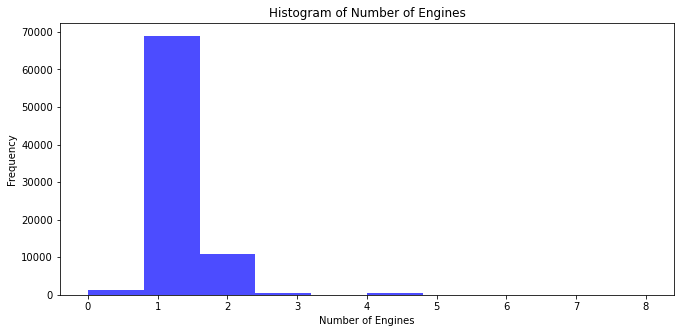

In [501]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))  # Single subplot

# Plotting the histogram to check the distribution of the Number of Engines column
ax.hist(aviation_data['Number_of_Engines'], bins=10, color='blue', alpha=0.7)

# Setting title and labels
ax.set_title('Histogram of Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Frequency')

# Show plot
plt.show()

The data distribution is relatively normal, replacing missing values with the mean of the column makes more sense.

In [502]:

# Replace NaN values with the mean of the 'Number_of_Engines' column
aviation_data['Number_of_Engines'].fillna(aviation_data['Number_of_Engines'].mean(), inplace=True)

# Round the values to two decimal places
aviation_data['Number_of_Engines'] = np.round(aviation_data['Number_of_Engines'], 2)


# checking for presence of missing values
aviation_data['Number_of_Engines'].isna().sum()


0

We'll check the distribution of the Longitude and Lattitude columns as well to determine how to deal with the missing data.

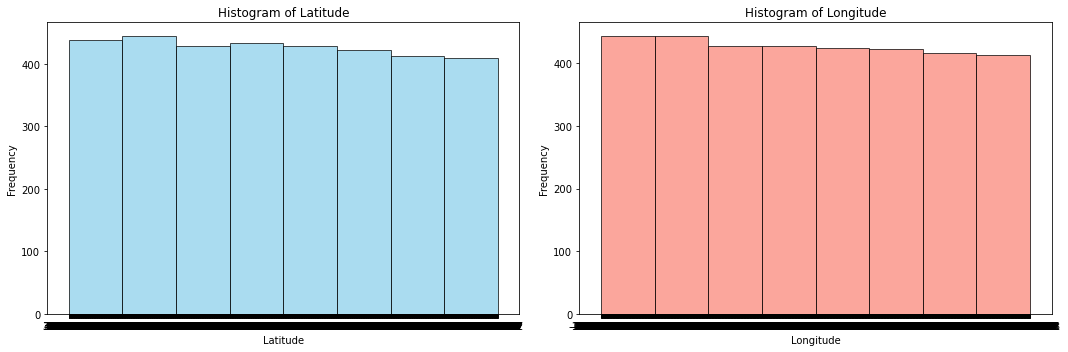

In [394]:

latitude_sample = aviation_data['Latitude'].dropna().sample(frac=0.1, random_state=42)
longitude_sample = aviation_data['Longitude'].dropna().sample(frac=0.1, random_state=42)

# Creating a figure with 2 plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


# Plot histograms for sampled data
axs[0].hist(latitude_sample, bins=8, color='skyblue', alpha=0.7, edgecolor='black')

axs[0].set_title('Histogram of Latitude')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Frequency')


# Plot histogram for Longitude
axs[1].hist(longitude_sample, bins=8, color='salmon', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of Longitude')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show() 


From the histogram we cold see that the data in **Lattitude**  and **Longitude** Columns are **Skewed Distributions** This means we can only replace the missing values with the median and not the mean because mean is used to replace normal distributions.



In [503]:

#We notice some structural issues that we need to strip off first
aviation_data['Latitude']


# Remove non-numeric characters (keep only digits and decimal point)
aviation_data['Latitude'] = aviation_data['Latitude'].replace(r'[^\d.-]', '', regex=True).astype(float)
aviation_data['Longitude'] = aviation_data['Longitude'].replace(r'[^\d.-]', '', regex=True).astype(float)

# fill NaN values with the median
aviation_data['Latitude'].fillna(aviation_data['Latitude'].median(), inplace=True)
aviation_data['Longitude'].fillna(aviation_data['Longitude'].median(), inplace=True)

# round the values to 2 decimal places
aviation_data['Latitude'] = aviation_data['Latitude'].round(2)
aviation_data['Longitude'] = aviation_data['Longitude'].round(2)


#checking for any null values left
aviation_data['Latitude'].isnull().sum()
aviation_data['Longitude'].isnull().sum()



0

In [504]:

# Replacing the Report ststus column null values 'Nan' with placeholder 'UNKNOWN'
# Assuming the missing values are reports that were not received or that are not known
aviation_data['Report_Status'].fillna('UNKNOWN', inplace=True)

# check whether missing values have been dropped
aviation_data['Report_Status'].isna().sum()


0

In [505]:
#Using forward fill to deal with missing data on Amateur Built column
#This is because there is a trend in the values so we can assume those missing bare the same 
aviation_data['Amateur_Built'].ffill(inplace=True)
aviation_data['Amateur_Built'].bfill(inplace=True)

#checking for any null values left
aviation_data['Amateur_Built'].isnull().sum()

0

In [506]:
# Handling missing data in Aircraft Damage data, Country, Purpose of flight, broadphase of flight and Injury severity data
# Replacing with 'UNKNOWN' placeholder because it is categorical data
aviation_data['Aircraft_damage'].fillna('UNKNOWN', inplace=True)
aviation_data['Injury_Severity'].fillna('UNKNOWN', inplace=True)
aviation_data['Country'].fillna('UNKNOWN', inplace=True)
aviation_data['Broad_phase_of_flight'].fillna('UNKNOWN', inplace=True)
aviation_data['Weather_Condition'].fillna('UNKNOWN', inplace=True)
aviation_data['Purpose_of_flight'].fillna('UNKNOWN', inplace=True)

# check whether missing values have been dropped
aviation_data['Aircraft_damage'].isna().sum()
aviation_data['Injury_Severity'].isna().sum()
aviation_data['Country'].isna().sum()
aviation_data['Broad_phase_of_flight'].isna().sum()
aviation_data['Weather_Condition'].isna().sum()
aviation_data['Purpose_of_flight'].isna().sum()


0

There are columns that we will require to drop as they are not relevant to our analysis and some have very many missing values that we cannot assume

In [507]:
# check for the missing values left
aviation_data.isnull().any()

Event_Id                  False
Investigation_Type        False
Accident_Number           False
Event_Date                False
Location                  False
Country                   False
Latitude                  False
Longitude                 False
Airport_Code               True
Airport_Name               True
Injury_Severity           False
Aircraft_damage           False
Aircraft_Category         False
Registration_Number        True
Make                      False
Model                     False
Amateur_Built             False
Number_of_Engines         False
Engine_Type               False
Purpose_of_flight         False
Air_carrier                True
Total_Fatal_Injuries      False
Total_Serious_Injuries    False
Total_Minor_Injuries      False
Total_Uninjured           False
Weather_Condition         False
Broad_phase_of_flight     False
Report_Status             False
Publication_Date           True
dtype: bool

In [508]:
# Drop all columns with any missing values (NaN)
aviation_data.dropna(axis=1, inplace=True)

# Check the DataFrame to ensure columns with missing values have been dropped
aviation_data.isnull().sum()


Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury_Severity           0
Aircraft_damage           0
Aircraft_Category         0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
dtype: int64

In [509]:
# checking the current shape of our dataframe
aviation_data.shape

(87787, 24)

In [510]:
# To preview the data again
aviation_data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Injury_Severity,Aircraft_damage,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,SEA87LA080,24-10-1948,"MOOSE CREEK, ID",United States,40952.00,107438.00,Fatal(2),Destroyed,...,1.00,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",United States,40952.00,107438.00,Fatal(4),Destroyed,...,1.00,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",United States,36.92,-81.88,Fatal(3),Destroyed,...,1.00,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",United States,40952.00,107438.00,Fatal(2),Destroyed,...,1.00,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,02-08-1979,"Canton, OH",United States,40952.00,107438.00,Fatal(1),Destroyed,...,1.14,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


### Dealing with Outliers

In [512]:
# Checking for outliers in Numerical data columns usin IQR
# Calculate IQR and detect outliers for Latitude and Longitude columns
columns_to_check = ['Latitude', 'Longitude']

for column in columns_to_check:
    #Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = aviation_data[column].quantile(0.25)
    Q3 = aviation_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    #Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Identify the outliers for the current column
    outliers = aviation_data[(aviation_data[column] < lower_bound) | (aviation_data[column] > upper_bound)]
    
    # Print the outliers for the current column
    if not outliers.empty:
        print(f"Outliers detected in column: {column}")
        print(outliers[['Event_Id', column]])  # Print out Event_Id and the outlier column values
        print()
    else:
        print(f"No outliers detected in column: {column}\n")

 

Outliers detected in column: Latitude
             Event_Id   Latitude
2      20061025X01555      36.92
5      20170710X52551      42.45
593    20080417X00504      30.76
3654   20051208X01953      46.04
6202   20020904X01525      48.12
...               ...        ...
88869  20221213106455   47257.00
88873  20221215106463  182724.00
88876  20221219106475  373829.00
88877  20221219106470  282825.00
88886  20221227106497  341525.00

[34168 rows x 2 columns]

Outliers detected in column: Longitude
             Event_Id   Longitude
2      20061025X01555      -81.88
5      20170710X52551      -70.76
593    20080417X00504      -88.36
3654   20051208X01953     -120.85
6202   20020904X01525     -113.89
...               ...         ...
88869  20221213106455   109280.00
88873  20221215106463    66554.00
88876  20221219106475   972635.00
88877  20221219106470   822719.00
88886  20221227106497  1112021.00

[34161 rows x 2 columns]



In [513]:
# Columns to remove outliers
columns_to_check = ['Latitude','Longitude']

# IQR for each column and remove outliers
for col in columns_to_check:
    Q1 = aviation_data[col].quantile(0.25)
    Q3 = aviation_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # filter for each column
    aviation_data = aviation_data[(aviation_data[col] >= lower_bound) & (aviation_data[col] <= upper_bound)]

#filtered data
print(aviation_data)


             Event_Id Investigation_Type Accident_Number  Event_Date  \
0      20001218X45444           Accident      SEA87LA080  24-10-1948   
1      20001218X45447           Accident      LAX94LA336  19-07-1962   
3      20001218X45448           Accident      LAX96LA321  19-06-1977   
4      20041105X01764           Accident      CHI79FA064  02-08-1979   
6      20001218X45446           Accident      CHI81LA106  01-08-1981   
...               ...                ...             ...         ...   
88883  20221228106502           Accident      GAA23WA046  22-12-2022   
88884  20221227106491           Accident      ERA23LA093  26-12-2022   
88885  20221227106494           Accident      ERA23LA095  26-12-2022   
88887  20221227106498           Accident      WPR23LA076  26-12-2022   
88888  20221230106513           Accident      ERA23LA097  29-12-2022   

              Location        Country  Latitude  Longitude Injury_Severity  \
0      MOOSE CREEK, ID  United States   40952.0   107438.

In [ ]:
# Loop through the column series and convert each value to lowercase
for index, value in aviation_data['Make'].items():
    aviation_data.at[index, 'Make'] = value.lower()

#  unique values
print(aviation_data['Make'].unique())



['stinson' 'piper' 'rockwell' ... 'mooney aircraft corp.' 'royse ralph l'
 'grumman american avn. corp.']


## Data Analysis

### Summary statistics


In [514]:
aviation_data.describe()

,Latitude,Longitude,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,53609.0,53609.0,53609.000000,53609.000000,53609.000000,53609.000000,53609.00000
mean,40952.0,107438.0,1.158177,0.626089,0.225522,0.358988,5.15572
std,0.0,0.0,0.449036,5.990915,1.410393,2.570046,27.16981
min,40952.0,107438.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,40952.0,107438.0,1.000000,0.000000,0.000000,0.000000,0.00000
50%,40952.0,107438.0,1.000000,0.000000,0.000000,0.000000,1.00000
75%,40952.0,107438.0,1.000000,0.000000,0.000000,0.000000,2.00000
max,40952.0,107438.0,4.000000,349.000000,161.000000,380.000000,588.00000


Obtaining summary staatistics of the dataset is also quite important. We intend to split the dataset into subgroups to see if we can notice any trends. We'll use the `groupby()` method to aggregate the data. This aggregate function will help us compare subsets of our data.










In [515]:
# Group by 'Aircraft_Category' and calculate sum, and count for some numerical columns
agg_data = aviation_data.groupby('Aircraft_Category').agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Serious_Injuries': 'sum',
    'Total_Minor_Injuries': 'sum',
})

agg_data


,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries
Aircraft_Category,,,
Airplane,29762.0,10426.0,16807.0
Balloon,212.0,27.0,13.0
Blimp,0.0,0.0,0.0
Glider,206.0,136.0,136.0
Gyrocraft,4.0,4.0,4.0
Helicopter,3369.0,1496.0,2285.0
Powered-Lift,0.0,0.0,0.0
UNK,0.0,0.0,0.0
Ultralight,5.0,0.0,0.0


In [516]:
# Group by 'Purpose_of_flight' and apply multiple functions on different columns
agg_data = aviation_data.groupby('Aircraft_damage').agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Serious_Injuries': 'sum',
    'Latitude': 'mean',
    'Longitude': 'mean'
})

agg_data


,Total_Fatal_Injuries,Total_Serious_Injuries,Latitude,Longitude
Aircraft_damage,,,,
Destroyed,30114.0,5707.0,40952.0,107438.0
Minor,245.0,330.0,40952.0,107438.0
Substantial,2409.0,5212.0,40952.0,107438.0
UNKNOWN,758.0,841.0,40952.0,107438.0
Unknown,38.0,0.0,40952.0,107438.0


In [517]:
# Grouping by 'Country' and 'Aircraft_damage' and summing 'Total_Fatal_Injuries'
agg_data = aviation_data.groupby(['Engine_Type', 'Number_of_Engines']).agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Serious_Injuries': 'sum',
    'Total_Uninjured': 'sum'
})

sorted_agg_data=agg_data.sort_values(by='Total_Fatal_Injuries', ascending=False)
sorted_agg_data=agg_data.sort_values(by='Total_Uninjured', ascending=False)
sorted_agg_data=agg_data.sort_values(by='Total_Serious_Injuries', ascending=False)

sorted_agg_data


Total_Fatal_Injuries  \
Engine_Type     Number_of_Engines                         
Reciprocating   1.00                            12240.0   
                1.14                             5350.0   
                2.00                             3523.0   
Unknown         1.14                             3248.0   
Turbo Shaft     1.00                              695.0   
Turbo Fan       2.00                             1877.0   
Turbo Prop      2.00                             1095.0   
Turbo Fan       3.00                              670.0   
Unknown         0.00                              319.0   
Turbo Fan       4.00                             1206.0   
                1.14                              690.0   
Turbo Shaft     2.00                              224.0   
Turbo Jet       2.00                              330.0   
Turbo Shaft     1.14                              606.0   
Turbo Prop      1.00                              191.0   
                1.14                              332.0   
Turbo Jet       3.00                                8.0   
Unknown         1.00                               14.0   
Turbo Jet       1.14                              148.0   
Reciprocating   0.00                                2.0   
                4.00                               51.0   
Turbo Jet       4.00                              260.0   
                1.00                               24.0   
Turbo Prop      4.00                              102.0   
Unknown         2.00                                1.0   
Electric        1.14                                1.0   
Turbo Prop      0.00                                0.0   
Turbo Fan       0.00                                0.0   
Turbo Shaft     0.00                                0.0   
Turbo Fan       1.00                               12.0   
Geared Turbofan 1.14                              176.0   
Reciprocating   3.00                              169.0   
Geared Turbofan 2.00                                0.0   
Unknown         3.00                                0.0   
                4.00                                0.0   

                                   Total_Serious_Injuries  Total_Uninjured  
Engine_Type     Number_of_Engines                                           
Reciprocating   1.00                               6923.0          40816.0  
                1.14                                871.0          42664.0  
                2.00                                856.0          13372.0  
Unknown         1.14                                841.0           8212.0  
Turbo Shaft     1.00                                578.0           2119.0  
Turbo Fan       2.00                                447.0          58844.0  
Turbo Prop      2.00                                300.0           9897.0  
Turbo Fan       3.00                                276.0          35277.0  
Unknown         0.00                                249.0           2214.0  
Turbo Fan       4.00                                155.0          24128.0  
                1.14                                126.0           4828.0  
Turbo Shaft     2.00                                106.0           1025.0  
Turbo Jet       2.00                                 94.0          11885.0  
Turbo Shaft     1.14                                 81.0           2451.0  
Turbo Prop      1.00                                 56.0            416.0  
                1.14                                 36.0           2889.0  
Turbo Jet       3.00                                 15.0           8871.0  
Unknown         1.00                                 13.0            586.0  
Turbo Jet       1.14                                 11.0            569.0  
Reciprocating   0.00                                 11.0             37.0  
                4.00                                 10.0            465.0  
Turbo Jet       4.00                                  9.0           3146.0  
   

In [518]:
aviation_data.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Injury_Severity',
       'Aircraft_damage', 'Aircraft_Category', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status'],
      dtype='object')

### Exporting Data

After our data was cleaned we exported it

In [537]:
#Saving our Dataset
cleaned_aviation_data=aviation_data.to_csv('clean_aviation_data.csv',index=False)



# Research Objectives


The main objective is to identify the lowest risk aircraft 

* To determine which aircraft model and make have the most fatalities and  damages.
* To determine which Engine type has the most damages and fatalities and discover the best Engine type.
* To determine the relationship between the number of engines and the aircraft damage
* to determine the relationship between aircraft category, the Make and the Damage.










# Data Evaluation

From the visualizations, the following analysis from a sample of first 10 accidents was made;



1. **Boeing** plane models have the highest average fatal injuries out of the top 10 fatal injuries but **Boeing** model holds the highest rank.
2. **cesna,boeing and piper** are the top aircraft makes that have the most number of Engines which means they have optimal performance with **cessna** having being the highest out of the three. However, **boieng** also doubles up as having the top highest number of fatalities as well as the highest record of those uninjured.
3. As for **Cessna** , the higher the number of engines the lower the fatality of the Injuries however the same does not apply to **Boeing**. **piper** has a moderate number of engines with very few fatalities
3.  **Reciprocating** engine records the highest number of fatalities both fatal and minor. However, also records the highest number of those uninjured.
4. **Turbo Fan** has the highest number of engines and also the worst aircradt damages however, it has amongst the least fatalities.
 5. **Aircrafts** have the worst damages during accidents and **Boeing** is the make that gets most destroyed out of all makes.The aircrafts with substatioal damages are **cessna and piper** with **cesna** being the highest. However, **cessna** also has one of the worst aircraft damages.





















# Conclusion and recommendations

The visualization of results provided in this study will provide more reliable and reusable information for our company in making decisions on purchasing aircrafts. They will also be able to make good business decisions on the aircrafts with both the highest and lowest risks .

From the analysis, i would recommend the following;

* Out of all aircrafts, the team should puchase more **helicopters and glider** than aeroplanes because record the least chances of fatalities and severe aircraft damages.
* If purchasing aeroplanes, the team should consider purchasing **piper** aircraft of model **PA-18** because from the it is the aircraft with the lowest risk of fatalities during accidents and severe  aircraft damages.
* The company should consider purchasing aircraft that uses **TurboFan** engine as opposed to **reciprocating** engine. **Turbofan** has the least record of fatalies and aircraft damages and it has more engines which means optimal performance and power. **Reciprocating** engine has recorded massive destruction at aircraft damages.








